# Business Problem
Diabetes is one of the deadliest and chronic diseases. About one in seven U.S. adults has diabetes now. By 2050, as many as one in three may become diabetic. Many complications occur if diabetes remains untreated and unidentified. Identifying patients who are at high-risk of becoming diabetic allows early medical interventions.

# CRISP - DM

## 1. Business Understanding

#### Objective
To identitfy patients who are high risk for diabetes early and help them lead a healthy life

#### Success Criteria
If we are able to reduce the percentage of people becoming diabetic by using the predicted data, that would be long term succcess criteria. Having an explainable model that predicts the chances of a patient becoming diabetic would improve the effect of medical intervention as the patients can understand the reasons for it.

#### Actions to be taken on prediction
Early medical intervention to prevent patients from becoming diabetic.

## 2. Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
len(data[data["Glucose"] == 0])

5

In [8]:
len(data[data["BloodPressure"] == 0])

35

In [9]:
len(data[data["SkinThickness"] == 0])

227

In [10]:
len(data[data["Insulin"] == 0])

374

In [11]:
len(data[data["BMI"] == 0])

11

We see that few data points are 0 for glucose, blood pressure, insulin and BMI which doesn't seem correct. We will impute these values with the mean of that respective column.

In [12]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
correlation[correlation > 0.2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,0.221898
Glucose,NaN,1.000000,NaN,NaN,0.331357,0.221071,NaN,0.263514,0.466581
BloodPressure,NaN,NaN,1.000000,0.207371,NaN,0.281805,NaN,0.239528,NaN
SkinThickness,NaN,NaN,0.207371,1.000000,0.436783,0.392573,NaN,NaN,NaN
Insulin,NaN,0.331357,NaN,0.436783,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,0.221071,0.281805,0.392573,NaN,1.000000,NaN,NaN,0.292695
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,0.263514,0.239528,NaN,NaN,NaN,NaN,1.000000,0.238356
Outcome,0.221898,0.466581,NaN,NaN,NaN,0.292695,NaN,0.238356,1.000000


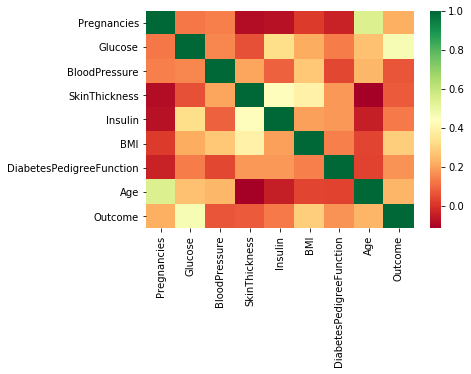

In [14]:
sns.heatmap(correlation, cmap = "RdYlGn")
plt.show()

Glucose, BMI, pregnancies and age are highly positively correlated with the outcome when compared with the other attributes. We also observe significant positive correlation between Glucose and insulin, pregnancies and age, glucose and age, blood pressure and BMI, blood pressure and age, skin thickness and insulin, skin thickness and BMI.

In [15]:
outcomes = data["Outcome"].value_counts()
outcomes/len(data)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Dataset is imbalanced

<BarContainer object of 2 artists>

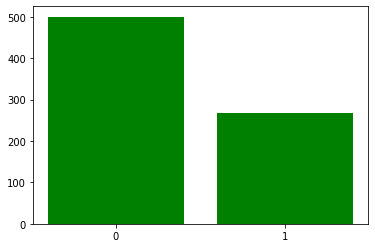

In [16]:
x = ["0", "1"]
plt.bar(x, outcomes, color = "green")

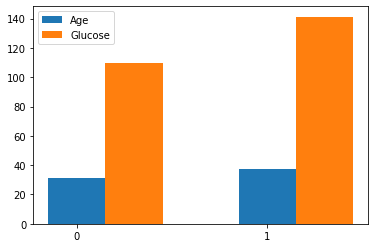

In [17]:
mean_age = data.groupby("Outcome").Age.mean()
mean_bmi = data.groupby("Outcome").BMI.mean()
mean_pregnancies = data.groupby("Outcome").Pregnancies.mean()
mean_glucose = data.groupby("Outcome").Glucose.mean()
mean_bp = data.groupby("Outcome").BloodPressure.mean()
mean_insulin = data.groupby("Outcome").Insulin.mean()
mean_skinthickness = data.groupby("Outcome").SkinThickness.mean()

x = ["0", "1"]
width =0.3
plt.bar(x, mean_age, width = width, label = "Age")
plt.bar(np.arange(len(mean_glucose)) + width, mean_glucose, width = width, label = "Glucose")
plt.legend()
plt.show()

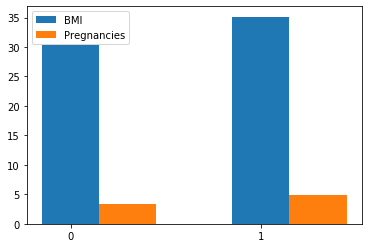

In [18]:
plt.bar(x, mean_bmi, width = width, label = "BMI")
plt.bar(np.arange(len(mean_pregnancies)) + width, mean_pregnancies, width = width, label = "Pregnancies")
plt.legend()
plt.show()

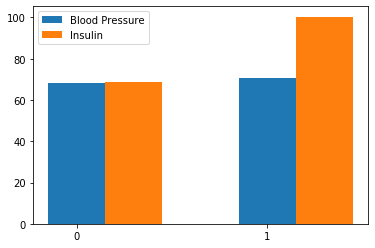

In [19]:
plt.bar(x, mean_bp, width = width, label = "Blood Pressure")
plt.bar(np.arange(len(mean_insulin)) + width, mean_insulin, width = width, label = "Insulin")
plt.legend()

plt.show()

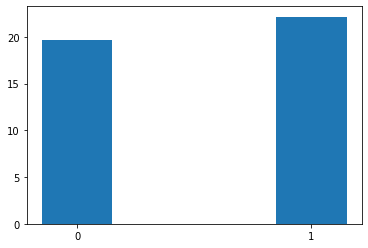

In [20]:
plt.bar(x, mean_skinthickness, width = width, label = "Skin Thickness")
plt.show()

## 3. Data Preparation

In [21]:
# Impute the zero values with mean
data.loc[(data["Glucose"] == 0) & (data["Outcome"] == 0), "Glucose"] = mean_glucose[0]
data.loc[(data["Glucose"] == 0) & (data["Outcome"] == 1), "Glucose"] = mean_glucose[1]

data.loc[(data["BloodPressure"] == 0) & (data["Outcome"] == 0), "BloodPressure"] = mean_bp[0]
data.loc[(data["BloodPressure"] == 0) & (data["Outcome"] == 1), "BloodPressure"] = mean_bp[1]

data.loc[(data["Insulin"] == 0) & (data["Outcome"] == 0), "Insulin"] = mean_insulin[0]
data.loc[(data["Insulin"] == 0) & (data["Outcome"] == 1), "Insulin"] = mean_insulin[1]

data.loc[(data["BMI"] == 0) & (data["Outcome"] == 0), "BMI"] = mean_bmi[0]
data.loc[(data["BMI"] == 0) & (data["Outcome"] == 1), "BMI"] = mean_bmi[1]

data.loc[(data["SkinThickness"] == 0) & (data["Outcome"] == 0), "SkinThickness"] = mean_skinthickness[0]
data.loc[(data["SkinThickness"] == 0) & (data["Outcome"] == 1), "SkinThickness"] = mean_skinthickness[1]

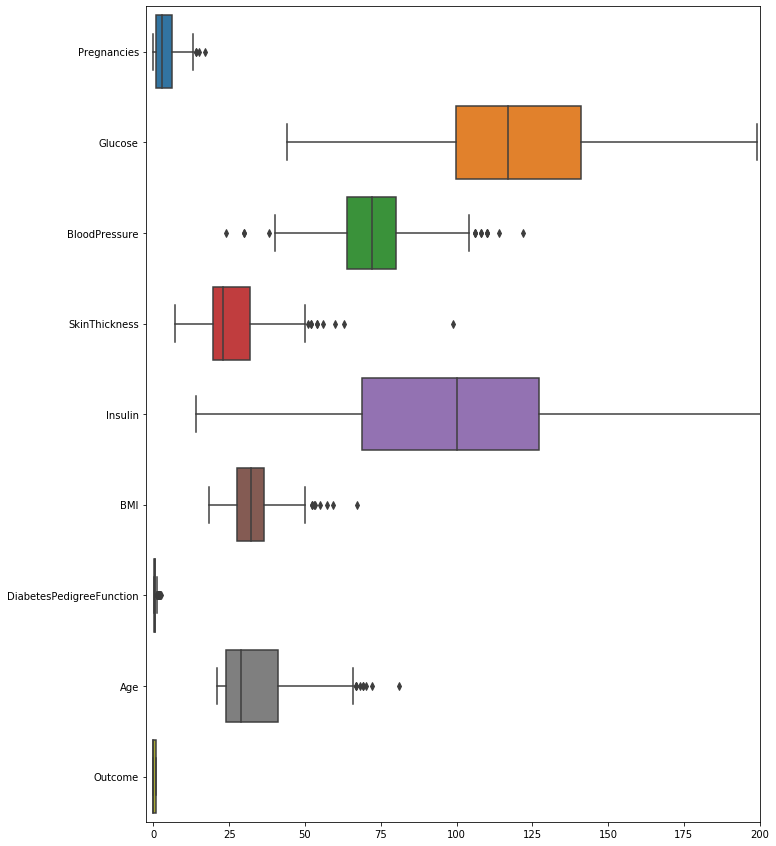

In [22]:
f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-2.5, 200))
sns.boxplot(data = data, orient = "h")

Since each column on the data is on a different scale, it is better to standardize the data

### Train Test Split

In [23]:
y = data["Outcome"]
X = data.iloc[:, 0:8]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 23)

In [25]:
col_names= data.columns[0:8]
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns = col_names)

scaled_X_test = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns = col_names)

In [26]:
scaled_X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.954045,-0.508458,-0.955317,-0.232279,-0.199705,-0.797289,-0.568337,-0.328922
1,-0.539525,-1.332118,0.012254,-1.164836,-0.481211,-0.284598,0.200274,-0.673939
2,-0.838239,0.578774,-2.084150,-0.750366,-0.400238,-0.483978,0.527929,-0.932701
3,-0.838239,-0.607297,0.657301,-1.579306,-0.411806,-1.808431,0.028791,-0.932701
4,-0.838239,-0.640243,0.173515,-0.422502,-0.199705,1.054096,-0.577524,0.792382
...,...,...,...,...,...,...,...,...
547,-0.240811,1.204756,0.334777,1.011131,1.473707,-0.070977,1.131182,-0.415176
548,0.057903,-0.739083,0.012254,-0.957601,-0.564590,-0.925462,-0.574461,-0.415176
549,-0.240811,1.929578,-0.632794,-0.128661,-0.550616,0.270818,-0.644892,-0.587684
550,-0.838239,-0.409618,-1.116579,-0.853983,-0.018508,-0.512461,-0.804126,-0.932701


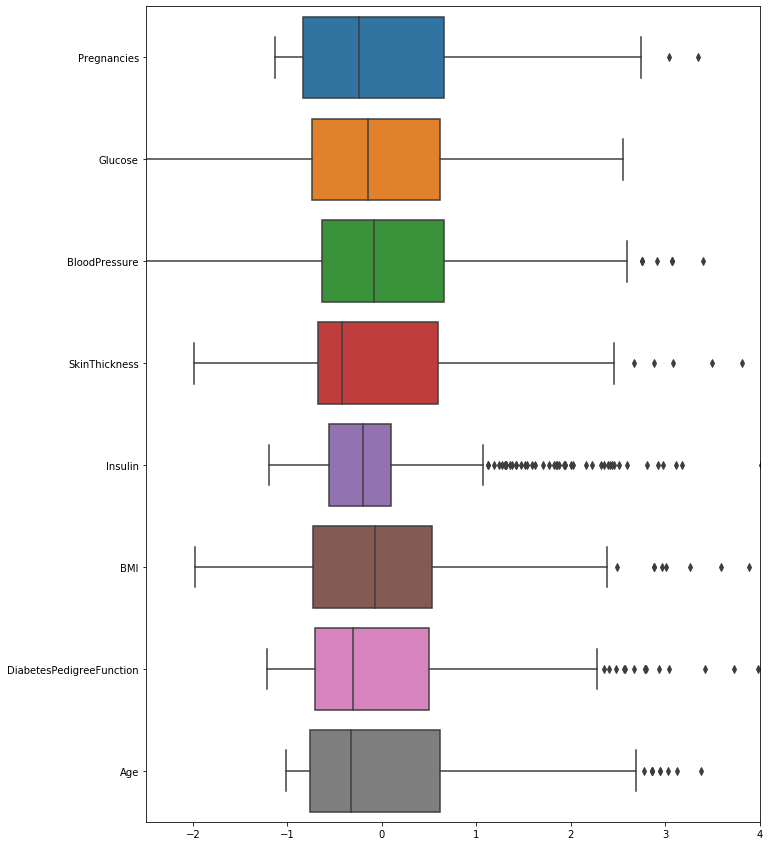

In [27]:
f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-2.5, 4))
sns.boxplot(data = scaled_X_train, orient = "h")

In [28]:
scaled_X_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.148238,0.206538,-0.009986,-0.014056,-0.006534,-0.044566,0.517875
Glucose,0.148238,1.000000,0.234827,0.218378,0.446644,0.224480,0.125096,0.272275
BloodPressure,0.206538,0.234827,1.000000,0.117694,0.020117,0.268585,-0.000492,0.310307
SkinThickness,-0.009986,0.218378,0.117694,1.000000,0.256723,0.528399,0.170740,0.054076
Insulin,-0.014056,0.446644,0.020117,0.256723,1.000000,0.229712,0.130566,0.043618
BMI,-0.006534,0.224480,0.268585,0.528399,0.229712,1.000000,0.178234,0.017698
DiabetesPedigreeFunction,-0.044566,0.125096,-0.000492,0.170740,0.130566,0.178234,1.000000,0.056205
Age,0.517875,0.272275,0.310307,0.054076,0.043618,0.017698,0.056205,1.000000


In [29]:
balanced = SMOTE(random_state=0)

balanced_X_train, balanced_y_train = balanced.fit_sample(scaled_X_train, y_train)
balanced_X_train = pd.DataFrame(data = balanced_X_train, columns = col_names )


print("Size of oversampled data : ",len(balanced_X_train))
print("No. of Non-diabetic in oversampled data : ",len(balanced_y_train[balanced_y_train == 0]))
print("No. of Diabetic in oversampled data : ",len(balanced_y_train[balanced_y_train == 1]))
print("Proportion of non-diabetic data in oversampled data is ",len(balanced_y_train[balanced_y_train == 0])/len(balanced_X_train))
print("Proportion of diabetic data in oversampled data is ",len(balanced_y_train[balanced_y_train == 1])/len(balanced_X_train))

Size of oversampled data :  720
No. of Non-diabetic in oversampled data :  360
No. of Diabetic in oversampled data :  360
Proportion of non-diabetic data in oversampled data is  0.5
Proportion of diabetic data in oversampled data is  0.5


Having a balanced dataset didn't have significant imrpovement in the model results. Hence not utilized.

## 4. Modeling

## Logistic Regression

In [30]:
logistic_model = LogisticRegression(max_iter = 450)

In [31]:
#Recursive Feature Elimination
rfe = RFE(logistic_model, 20)
rfe = rfe.fit(balanced_X_train, balanced_y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


Since we have only few features in the model, the RFE has selected all of the features to be included in the model

In [32]:
logistic_model_fit = logistic_model.fit(balanced_X_train, balanced_y_train)

In [33]:
y_pred_logit = logistic_model_fit.predict(scaled_X_test)

In [34]:
print('Accuracy of logistic regression model on test set: {:.2f}'.format(logistic_model_fit.score(scaled_X_test, y_test)))

Accuracy of logistic regression model on test set: 0.77


## GridSearchCV - Logistic Regression

In [35]:
param_grid = {'C': [0.01, 1, 5, 10, 25, 50, 90]}

gscv_logreg = GridSearchCV(logistic_model, param_grid, cv = 5)

gscv_logreg_results = gscv_logreg.fit(balanced_X_train, balanced_y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(gscv_logreg_results.best_params_)) 
#print("Best score is {}".format(best_gscv_logreg.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.01}


In [36]:
logreg_best_params = gscv_logreg_results.best_params_

In [37]:
best_logistic_reg = LogisticRegression(C = 0.09, max_iter = 250)

In [38]:
best_logistic_reg_model = best_logistic_reg.fit(balanced_X_train, balanced_y_train)

In [39]:
print("Best score is {:.2f}".format(best_logistic_reg_model.score(scaled_X_test, y_test)))

Best score is 0.77


In [40]:
best_y_pred_logit = best_logistic_reg_model.predict(scaled_X_test)

## SVM

In [41]:
svm_model = svm.SVC(probability = True)

In [42]:
svm_model_fit = svm_model.fit(balanced_X_train, balanced_y_train)

In [43]:
y_pred_svm = svm_model_fit.predict(scaled_X_test)

In [44]:
svm_model_fit.support_vectors_

array([[-0.83823893,  0.5787744 , -2.08415025, ..., -0.48397797,
         0.52792929, -0.93270098],
       [-1.13695287,  0.8423458 ,  1.06045544, ...,  1.52406359,
        -0.32642346, -0.76019271],
       [-0.53952499, -0.01426127, -0.14900829, ...,  0.99713069,
         1.23835881, -0.84644685],
       ...,
       [ 2.11912494, -0.80667039, -0.97139186, ..., -0.65368453,
         1.58085228,  0.79099494],
       [ 1.85018651,  0.18249912, -0.69099096, ...,  1.171245  ,
        -0.20415792,  0.34741546],
       [ 0.58184986, -0.24523848,  0.09245344, ..., -0.03571552,
         0.77334665,  0.14524519]])

In [45]:
print('Accuracy of svm model on test set: {:.2f}'.format(svm_model_fit.score(scaled_X_test, y_test)))

Accuracy of svm model on test set: 0.83


## GridSearch CV - SVM

In [46]:
gsc_svm = GridSearchCV(estimator = svm.SVC(),
             param_grid = {'C': [0.1, 1, 4, 5, 10, 50, 100, 100], 'kernel': ('linear', 'rbf'), 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]})

In [47]:
gsc_svm_result = gsc_svm.fit(balanced_X_train, balanced_y_train)

In [48]:
print("Tuned Logistic Regression Parameters: {}".format(gsc_svm_result.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}


In [49]:
best_params = gsc_svm_result.best_params_
best_svm = svm.SVC(kernel = best_params["kernel"], C = best_params["C"], gamma = best_params["gamma"], probability = True).fit(balanced_X_train, balanced_y_train)

In [50]:
print('Accuracy of svm model on test set: {:.2f}'.format(best_svm.score(scaled_X_test, y_test)))

Accuracy of svm model on test set: 0.79


In [51]:
best_y_pred_svm = best_svm.predict(scaled_X_test)

## Random Forest classification

In [52]:
random_forest_model = RandomForestClassifier(n_estimators = 100, bootstrap = True,)

In [53]:
random_forest_model_fit = random_forest_model.fit(balanced_X_train, balanced_y_train)

In [54]:
y_pred_rdm_forest = random_forest_model_fit.predict(scaled_X_test)

In [55]:
print('Accuracy of random forest model on test set: {:.2f}'.format(random_forest_model_fit.score(scaled_X_test, y_test)))

Accuracy of random forest model on test set: 0.90


## GridSearch CV - Random Forest

In [56]:
gsc_rdm_forest = GridSearchCV(estimator = RandomForestClassifier(),
             param_grid={'n_estimators': [100, 5000], 'max_depth' : [1, 200], 'criterion' : ['gini', 'entropy']})

In [57]:
gsc_rdm_forest_result = gsc_rdm_forest.fit(balanced_X_train, balanced_y_train)

In [58]:
best_param = gsc_rdm_forest_result.best_params_

In [59]:
best_random_forest_model = RandomForestClassifier(n_estimators = best_param["n_estimators"], max_depth = best_param["max_depth"], 
                                             bootstrap = True).fit(balanced_X_train, balanced_y_train)

In [60]:
print('Accuracy of random forest model on test set: {:.2f}'.format(best_random_forest_model.score(scaled_X_test, y_test)))

Accuracy of random forest model on test set: 0.90


In [61]:
best_y_pred_rdm_forest = best_random_forest_model.predict(scaled_X_test)

## 5. Evaluation

## Confusion Matrix

In [62]:
confusion_matrix(y_test, best_y_pred_logit)
#confusion_matrix_logit = confusion_matrix(y_test, best_y_pred_logit)
#print(confusion_matrix_logit)

array([[104,  36],
       [ 14,  62]], dtype=int64)

In [63]:
confusion_matrix_svm = confusion_matrix(y_test, best_y_pred_svm)
print(confusion_matrix_svm)

[[110  30]
 [ 15  61]]


In [64]:
confusion_matrix_rdm_forest = confusion_matrix(y_test, best_y_pred_rdm_forest)
print(confusion_matrix_rdm_forest)

[[122  18]
 [  3  73]]


Based on the confusion matrix, we can see the the model performances keeps improving from the base logistic regresion. SVM is better than logistic regression while the random forest perform the best.

## Precision & Recall

In [65]:
print(classification_report(y_test, best_y_pred_logit))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       140
           1       0.63      0.82      0.71        76

    accuracy                           0.77       216
   macro avg       0.76      0.78      0.76       216
weighted avg       0.79      0.77      0.77       216



In [66]:
print(classification_report(y_test, best_y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       140
           1       0.67      0.80      0.73        76

    accuracy                           0.79       216
   macro avg       0.78      0.79      0.78       216
weighted avg       0.81      0.79      0.80       216



In [67]:
print(classification_report(y_test, best_y_pred_rdm_forest))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       140
           1       0.80      0.96      0.87        76

    accuracy                           0.90       216
   macro avg       0.89      0.92      0.90       216
weighted avg       0.91      0.90      0.90       216



We can observe that both the F1-score and the accuracy of the models increase as we move from logitic regression to SVM and then to random forest finally.

### Improving the recall metric

Modifying the threshold to 0.6 instead of 0,5, improves the recall percentange while balancing the precision.

In [68]:
threshold = 0.6

predicted_proba = best_random_forest_model.predict_proba(scaled_X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

best_random_forest_model.score(scaled_X_test, y_test)

0.9027777777777778

In [69]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.84      0.88      0.86        76

    accuracy                           0.90       216
   macro avg       0.89      0.89      0.89       216
weighted avg       0.90      0.90      0.90       216



In [70]:
pred_rdm = np.array(predicted)

In [71]:
print(confusion_matrix(y_test, pred_rdm))

[[127  13]
 [  9  67]]


## ROC AUC

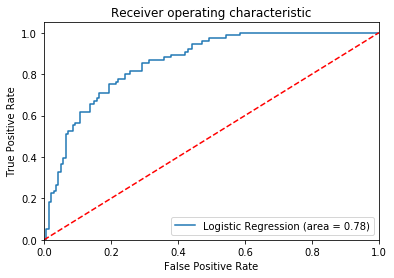

In [72]:
logit_roc_auc = roc_auc_score(y_test, best_y_pred_logit)
fpr, tpr, thresholds = roc_curve(y_test, best_logistic_reg_model.predict_proba(scaled_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

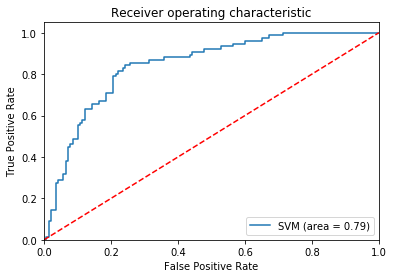

In [73]:
svm_roc_auc = roc_auc_score(y_test, best_y_pred_svm)
fpr, tpr, thresholds = roc_curve(y_test, best_svm.predict_proba(scaled_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

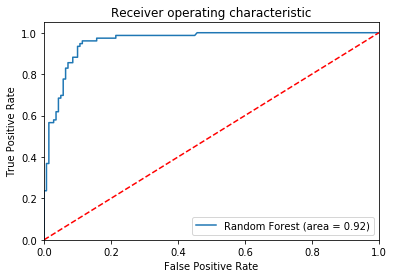

In [74]:
rdm_forest_roc_auc = roc_auc_score(y_test, best_y_pred_rdm_forest)
fpr, tpr, thresholds = roc_curve(y_test, best_random_forest_model.predict_proba(scaled_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rdm_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Business Interpretation (false negatives vs false positives)

When comparing the 3 types of classifiers, the random forest model has a better accuracy. But since the dataset is imbalanced, we need to use precision/ recall metric to evaluate the models.

Since our use case is classifying pateints as diabetic and non-diabetic, the false negative is more serious when compared to the false positive. Flase negative means that we classified a diabetic patient as non-diabetic and missed the opportunity for early intervention. 

The impact of false positive is less as we are only doing early medical interventions like suggestions on lifestyle, diet. A continuous medication would be suggested only if the patients condition gets worse with respect to the features such as Insulin, BMI, blood pressure and so on.

As we weigh the recall metric more for this use-case, the random forest model would be the best one as it has a 90% recall and misclassifies only 13 datapoints as false negatives. The model is 90% accurate.

## 6. Deployment

For this example, we might improve the random forest more in terms of training with more labelled data before actually deploying it live. The deployment will also involve other considerations such as batch or real-time predictions, data pipelines for the model.